# Applying a $$-d^2 / dx^2$$ filter to a 1D signal

In [3]:
from scipy.sparse import dok_matrix # sparse matrices
from scipy.sparse import linalg
import numpy

Domain is [0, 1] and n is the number of intervals

In [4]:
n = 10
xmin, xmax = 0., 1.
h = (xmax - xmin)/float(n)
xs = numpy.linspace(xmin, xmax, n + 1)

Finite element matrices with zero derivative boundary conditions at x = 0 and x = 1

In [9]:
deriv2 = dok_matrix((n + 1, n + 1), numpy.float64) # (grad phi, grad phi)
ident = dok_matrix((n + 1, n + 1), numpy.float64) # (phi, phi)
# fill in the interior cells
for i in range(1, n):
    deriv2[i, i] = 2.0/h
    deriv2[i, i - 1] = -1.0/h
    deriv2[i, i + 1] = -1.0/h
    ident[i, i] = 2*h/3.
    ident[i, i - 1] = h/6.
    ident[i, i + 1] = h/6.
# boundary cells
deriv2[0, 0] = 1.0/h
deriv2[0, 1] = -1.0/h
ident[0, 0] = h/3.
ident[0, 1] = h/6.
deriv2[n, n] = 1.0/h
deriv2[n, n - 1] = -1.0/h
ident[n, n] = h/3.
ident[n, n - 1] = h/6.

Solve linear system ident * u = deriv2 * u with 

In [15]:
u = numpy.cos(numpy.pi*xs)
rhs = deriv2 * u
vfe = linalg.spsolve(ident, rhs)
vfd = rhs/h
vexact = numpy.pi**2 * numpy.cos(numpy.pi*xs)

C:\Users\pletzera\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:96: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


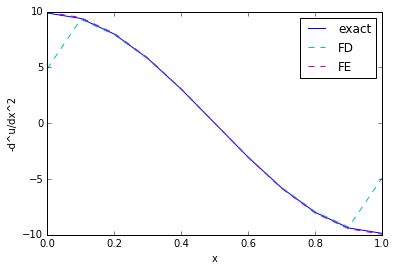

In [16]:
%matplotlib inline
from matplotlib import pylab
pylab.plot(xs, vexact, 'b-', xs, vfd, 'c--', xs, vfe, 'm--')
pylab.xlabel('x')
pylab.ylabel('-d^u/dx^2')
pylab.legend(['exact', 'FD', 'FE'])

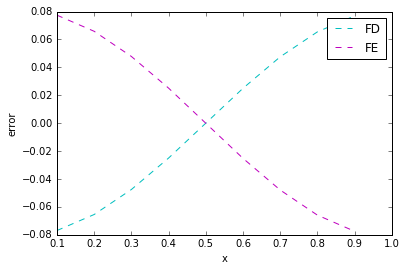

In [19]:
pylab.plot(xs[1:-1], vfd[1:-1] - vexact[1:-1], 'c--', xs[1:-1], vfe[1:-1] - vexact[1:-1], 'm--')
pylab.xlabel('x')
pylab.ylabel('error')
pylab.legend(['FD', 'FE'])

## Bottom line

 1. The finite element method works well for filtering problems, ie applying derivative operators to an input signal
 2. Finite element (FE) and finite difference (FD) differ in that the former involves computing a discretized version of the identity operator. This then involves solving a linear system. The matrix to invert is symmatric, with a dominant diagonal and well conditioned, no negative eigenvalues. The FD method does not require a matrix solve but will only work for a uniform mesh.
 3. Zero fluxes boundary conditions are straighforward to implement in FE. In the FD case the BCs are not quite correct; they correspond to zero drivate being applied on the ghost cells (h/2 outside the domain). Hence, there is significant error at the boundaries. 
 4. The FE and FD errors are comparable but of ooposite sign, suggesting that the best identity discretization involves mixing the FE and FD identities.